In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("leonardopena/marvel-vs-dc")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/leonardopena/marvel-vs-dc/versions/1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


df = pd.read_csv(os.path.join(path, "db.csv"), encoding="latin-1")

In [14]:
df

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,6,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,7,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,8,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,9,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,10,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           39 non-null     int64  
 1   Original Title       39 non-null     object 
 2   Company              39 non-null     object 
 3   Rate                 39 non-null     float64
 4   Metascore            39 non-null     int64  
 5   Minutes              39 non-null     object 
 6   Release              39 non-null     int64  
 7   Budget               39 non-null     object 
 8   Opening Weekend USA  39 non-null     int64  
 9   Gross USA            39 non-null     int64  
 10  Gross Worldwide      39 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 3.5+ KB


In [16]:
df1 = df.drop(["Unnamed: 0", "Original Title"], axis=1)

In [17]:
df1

,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [18]:
y = df1["Company"]
X = df1.drop(["Company"], axis=1)

<Axes: >

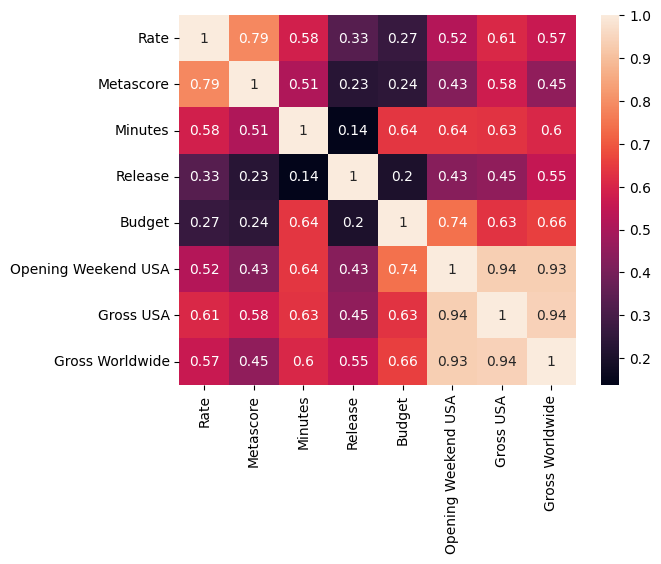

In [25]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

sns.heatmap(X.corr(), annot=True)

In [26]:
corr = X.corr()

corr["Rate"].sort_values(ascending=True)

Budget                 0.265655
Release                0.331977
Opening Weekend USA    0.521689
Gross Worldwide        0.565348
Minutes                0.583813
Gross USA              0.609582
Metascore              0.786901
Rate                   1.000000
Name: Rate, dtype: float64

In [20]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(std_X, y, train_size=0.7)

In [22]:
model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9166666666666666

In [23]:
y_preds = model.predict(X_test)

pd.DataFrame(y)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
